# Sentiment analysis FIRST MONTH
The script aims to explore the datasets

- Sentiment_first.csv ("datasets/sentiment_chatgptfirst.csv")

### TO-DO:
use negative and positive tweets. discard neutral. there are too many neutrals. 
Section for negative (frequence, frequent words, topic)
Section for positive (''')

### Sentiment_chatgptfirst analysis 

In [79]:
#load data
import pandas as pd

df = pd.read_csv('datasets/sentiment_first.csv')
df.head()

,Unnamed: 0,user_name,user_description,tweets,clean_tweets,label,date
0,357647,norman meuschke,postdoc gipplab unigoettingen phd unikonstanz ...,#ChatGPT and similar #LLM pose a challenge to ...,chatgpt similar llm pose challenge academic in...,positive,2022-12-05 17:08:20+00:00
1,357646,devang,passionate nature software developer profession,Was just wondering is there any difference bet...,wondering difference jasper chatgpt gpt chatgp...,neutral,2022-12-05 17:08:44+00:00
2,357645,gabriel furstenheim,mathematician developer amazon previously geob...,Russel vs ChatGPT. It's also funny that it tak...,russel chatgpt it funny take long time answer ...,neutral,2022-12-05 17:09:04+00:00
3,357644,iamtmoyo,blockchain enthusiast philanthropist slave jav...,"Levels🙏🙏🙏,so happy for the chatGPT team for co...",levelsso happy chatgpt team com revolutionary ...,positive,2022-12-05 17:10:31+00:00
4,357643,nenu,brain meant processing million tweet post vide...,"ChatGPT is the biggest, smartest brain 🧠 in th...",chatgpt biggest smartest brain world right now...,positive,2022-12-05 17:11:10+00:00


In [82]:
df_temp = df[df.user_name != 'beyondbacktesting']
df_temp = df_temp[df_temp.user_name != 'richard geldreich']
df_temp = df_temp[df_temp.user_name != 'chatgpt']
df_temp = df_temp[df_temp.user_name != 'richard kim']
df_temp = df_temp[df_temp.user_name != 'datachazgpt not bot']
df = df_temp

In [83]:
print(len(df_temp))
print(len(df))

51422
51422


In [84]:
#sort tweets by date
df_sorted = df.sort_values(by='date')

In [85]:
df_sorted.date = pd.to_datetime(df_sorted.date)

In [86]:
df_sorted.date

0       2022-12-05 17:08:20+00:00
1       2022-12-05 17:08:44+00:00
2       2022-12-05 17:09:04+00:00
3       2022-12-05 17:10:31+00:00
4       2022-12-05 17:11:10+00:00
                   ...           
52332   2022-12-31 23:56:28+00:00
52333   2022-12-31 23:58:31+00:00
52334   2022-12-31 23:58:37+00:00
52335   2022-12-31 23:59:30+00:00
52336   2022-12-31 23:59:50+00:00
Name: date, Length: 51422, dtype: datetime64[ns, UTC]

In [87]:
#sort tweets by week
df_sorted['week'] = df_sorted.date.dt.week

/var/folders/vj/45n_sfss5yjgjjgf70dx93zm0000gn/T/ipykernel_8308/166556608.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_sorted['week'] = df_sorted.date.dt.week


In [88]:
week1 = df_sorted[df_sorted.week == 49]

In [89]:
week2 = df_sorted[df_sorted.week == 50]

In [90]:
week3 = df_sorted[df_sorted.week == 51]

In [91]:
week4 = df_sorted[df_sorted.week == 52]

In [92]:
sentiments = df.label

In [93]:
sentiments.value_counts()

neutral     23298
positive    18310
negative     9814
Name: label, dtype: int64

In [103]:
# save all the negativ values in a list and count them

negatives = df[df.label == 'negative']
positives = df[df.label == 'positive']
neutrals = df[df.label == 'neutral']

print("negatives: " ,len(neutrals))
print("positives: ", len(positives))
print("neutrales: ", len(negatives))



negatives:  23298
positives:  18310
neutrales:  9814


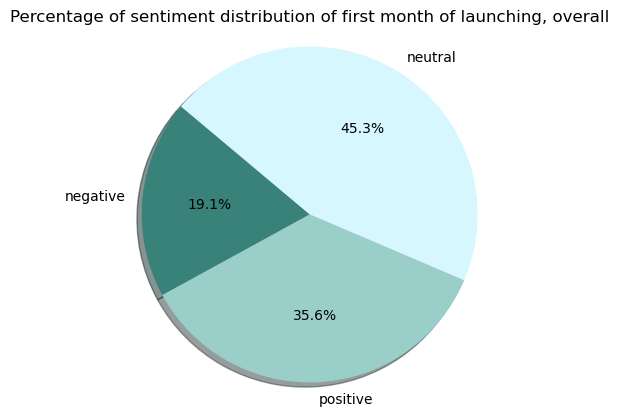

In [97]:
#plot the proportion of sentiments
import matplotlib.pyplot as plt 

labels = ['negative', 'positive', 'neutral']
sizes = [len(negatives), len(positives), len(neutrals)]
colors = ['#39827a', '#9acfc9', '#d7f7ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)    
plt.axis('equal')
plt.title('Percentage of sentiment distribution of first month of launching, overall')
plt.show()

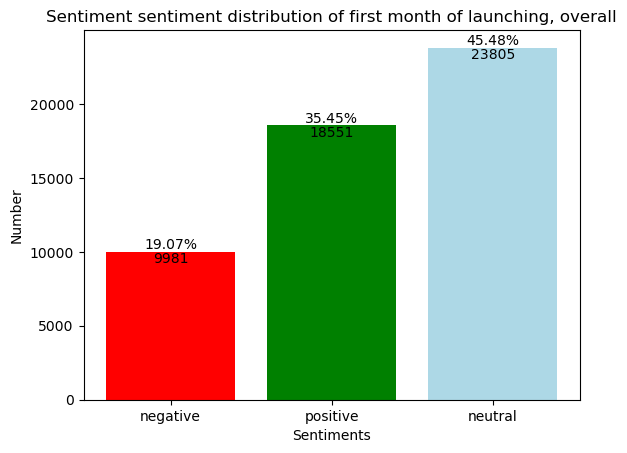

In [19]:
# histogram
import matplotlib.pyplot as plt

labels = ['negative', 'positive', 'neutral']
sizes = [len(negatives), len(positives), len(neutrals)]
colors = ['red', 'green', 'lightblue']

plt.bar(labels, sizes, color=colors)
#add the percentage of each sentiment in the bars
for i in range(len(sizes)):
    plt.text(i, sizes[i], str(round((sizes[i]/len(sentiments))*100, 2)) + '%', ha='center', va='bottom')  
    plt.text(i, sizes[i], str(sizes[i]), ha='center', va='top')  
    
plt.xlabel('Sentiments')
plt.ylabel('Number')
plt.title('Sentiment sentiment distribution of first month of launching, overall')
plt.show()


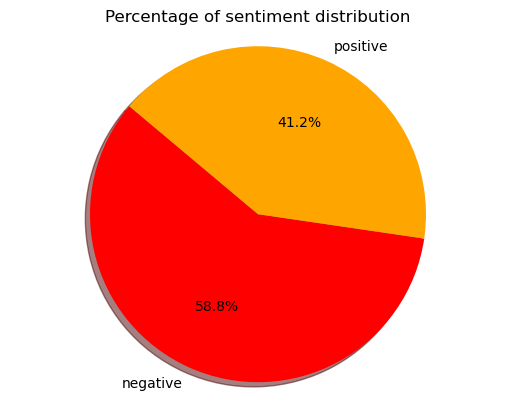

In [159]:
#Considering only positive and negative sentiments
labels = ['negative', 'positive']
sizes = [len(negatives), len(positives)]
colors = ['red', 'orange']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)    
plt.axis('equal')
plt.title('Percentage of sentiment distribution')
plt.show()

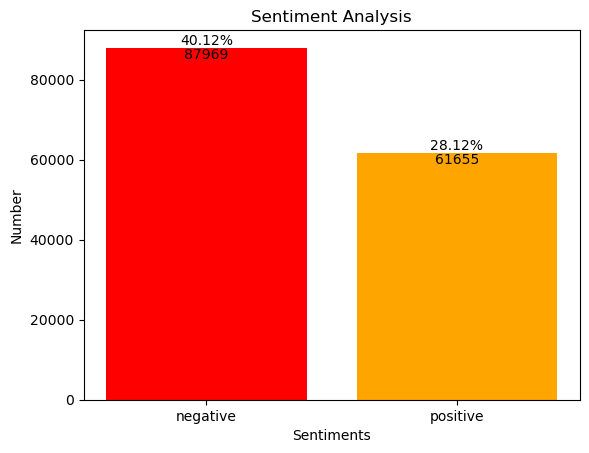

In [160]:
# histogram
import matplotlib.pyplot as plt

labels = ['negative', 'positive']
sizes = [len(negatives), len(positives)]
colors = ['red', 'orange']

plt.bar(labels, sizes, color=colors)
#add the percentage of each sentiment in the bars
for i in range(len(sizes)):
    plt.text(i, sizes[i], str(round((sizes[i]/len(sentiments))*100, 2)) + '%', ha='center', va='bottom')  
    plt.text(i, sizes[i], str(sizes[i]), ha='center', va='top')  
    
plt.xlabel('Sentiments')
plt.ylabel('Number')
plt.title('Sentiment Analysis')
plt.show()


## Analysis per week

In [98]:
week1.label.value_counts()

neutral     11400
positive     9763
negative     5367
Name: label, dtype: int64

In [99]:
week2.label.value_counts()


neutral     2308
positive    1866
negative    1040
Name: label, dtype: int64

In [100]:
week3.label.value_counts()

neutral     5260
positive    3674
negative    1892
Name: label, dtype: int64

In [101]:
week4.label.value_counts()

neutral     4330
positive    3007
negative    1515
Name: label, dtype: int64

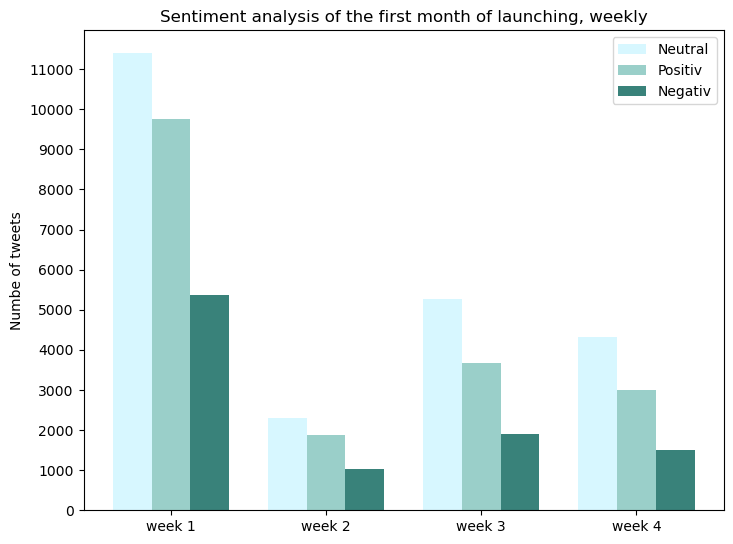

In [102]:
import numpy as np
import matplotlib.pyplot as plt

data = [[11400, 2308, 5260, 4330  ], #neutral
[9763, 1866, 3674, 3007], #positiv
[5367, 1040, 1892,1515]] #negativ
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.25, data[0], color = '#d7f7ff', width = 0.25)
ax.bar(X , data[1], color = '#9acfc9', width = 0.25)
ax.bar(X + 0.25, data[2], color = '#39827a', width = 0.25)
ax.set_ylabel('Numbe of tweets')
ax.set_title('Sentiment analysis of the first month of launching, weekly')
ax.set_xticks(X, ('week 1', 'week 2', 'week 3', 'week 4'))
ax.set_yticks(np.arange(0, 11609, 1000))
ax.legend(labels=['Neutral', 'Positiv', 'Negativ'])
plt.show()


# Word frequecy analysis

In [104]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet_positiv = [tweet.lower().split() for tweet in positives.clean_tweets]
words_in_tweet_negativ = [tweet.lower().split() for tweet in negatives.clean_tweets]

print(words_in_tweet_positiv[:2])
print(words_in_tweet_negativ[:2])

[['chatgpt', 'similar', 'llm', 'pose', 'challenge', 'academic', 'integrity', 'jan', 'wahle', 'explains', 'current', 'research', 'presented', 'emnlp', 'later', 'week', 'make', 'optimistic', 'challenge', 'met'], ['levelsso', 'happy', 'chatgpt', 'team', 'com', 'revolutionary', 'ideathe', 'future', 'look', 'bright', 'chatgpt']]
[['tomorrowsmps', 'agree', 'starmers', 'decision', 'axe', 'corbyn', 'labour', 'candidate', 'history', 'tolerance', 'antisemitism', 'concerning', 'place', 'party', 'chatgpt'], ['tomorrowsmps', 'keir', 'starmers', 'decision', 'axe', 'jeremy', 'corbyn', 'labour', 'candidate', 'show', 'touch', 'party', 'disaster', 'labour', 'divide', 'further', 'labour', 'chatgpt']]


In [105]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

# List of all words across tweets
pos_all_words = list(itertools.chain(*words_in_tweet_positiv))
neg_all_words = list(itertools.chain(*words_in_tweet_negativ))

# Create counter
pos_counts = collections.Counter(pos_all_words)
neg_counts = collections.Counter(neg_all_words)

print(pos_counts.most_common(20))
print(neg_counts.most_common(20))

[('chatgpt', 21628), ('openai', 3500), ('like', 1613), ('it', 1509), ('good', 1353), ('new', 1347), ('time', 1097), ('asked', 1091), ('use', 1070), ('write', 1064), ('tool', 1029), ('gpt', 1001), ('question', 925), ('answer', 925), ('great', 905), ('way', 875), ('google', 858), ('amazing', 856), ('thing', 823), ('future', 822)]
[('chatgpt', 11237), ('openai', 1431), ('like', 985), ('google', 811), ('it', 757), ('answer', 689), ('people', 599), ('write', 563), ('asked', 557), ('think', 556), ('know', 513), ('time', 507), ('question', 499), ('human', 482), ('thing', 453), ('use', 427), ('wrong', 413), ('dont', 407), ('gpt', 376), ('need', 362)]


In [106]:
pos_clean_tweets = pd.DataFrame(pos_counts.most_common(15),
                             columns=['words', 'count'])
neg_clean_tweets = pd.DataFrame(neg_counts.most_common(15),
                             columns=['words', 'count'])

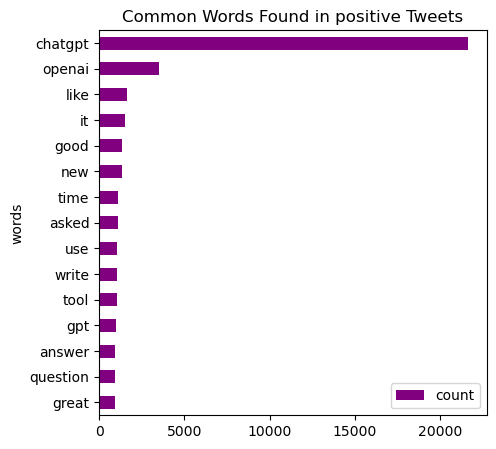

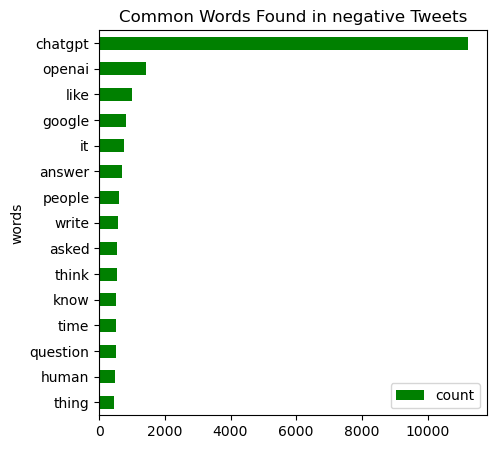

In [107]:
fig, ax = plt.subplots(figsize=(5, 5))

# Plot horizontal bar graph
pos_clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in positive Tweets")

plt.show()

fig, ax = plt.subplots(figsize=(5, 5))

# Plot horizontal bar graph
neg_clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in negative Tweets")

plt.show()

### WordCloud

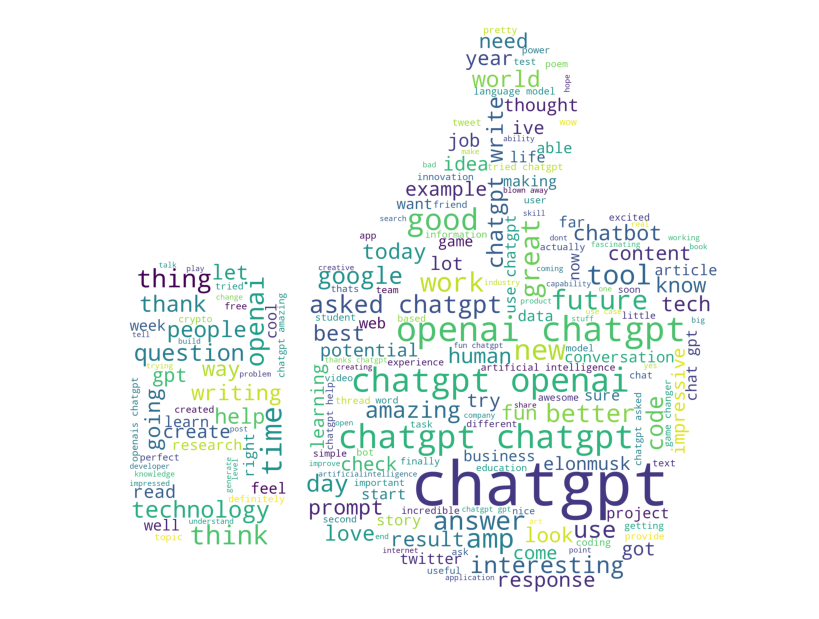

In [108]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
 
comment_words = ''
stopwords = set(STOPWORDS)

p = ", ".join(pos_all_words)

mask = np.array(Image.open("/Users/barbararuvolo/Desktop/EPFL/Digital Musicology/computational-social-media/wordcloud_images/upvote.png"))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10, mask=mask).generate(p)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

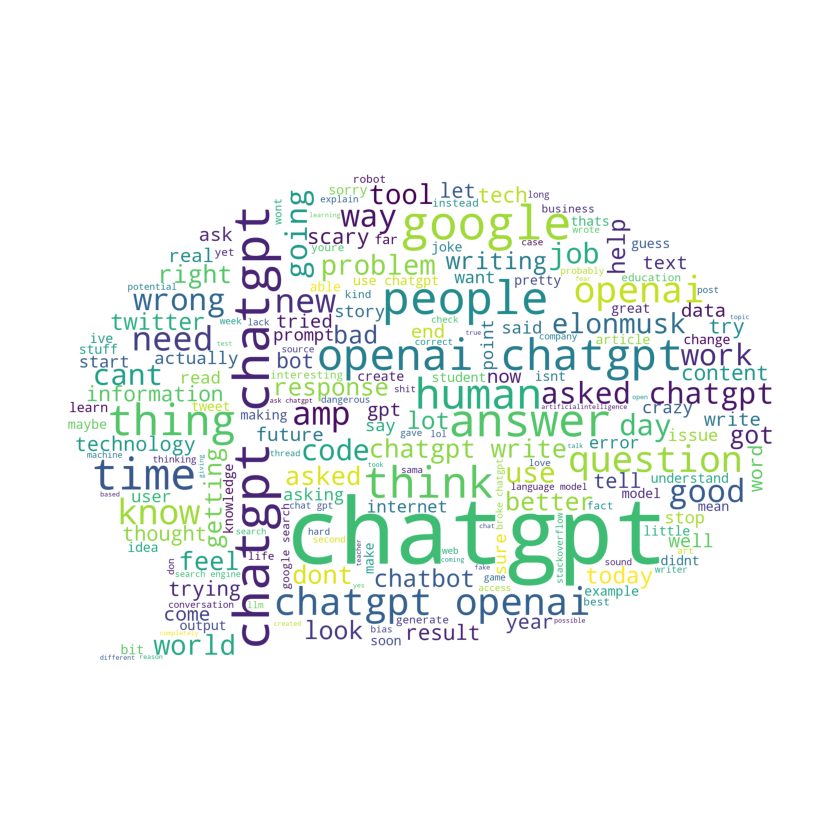

In [109]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
 
comment_words = ''
stopwords = set(STOPWORDS)

n = ", ".join(neg_all_words)
 
mask = np.array(Image.open("/Users/barbararuvolo/Desktop/EPFL/Digital Musicology/computational-social-media/wordcloud_images/comment.png"))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10, mask=mask).generate(n)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Emotion Analysis First month

In [152]:
# load data 
import pandas as pd
import numpy as np
all_emotions = pd.read_csv('/Users/barbararuvolo/Desktop/EPFL/Digital Musicology/computational-social-media/datasets/sentiment_fixed_first.csv')

In [153]:
all_emotions

,user_name,user_description,tweets,label,date,emotion
0,norman meuschke,postdoc gipplab unigoettingen phd unikonstanz ...,#ChatGPT and similar #LLM pose a challenge to ...,positive,2022-12-05 17:08:20+00:00,optimism
1,iamtmoyo,blockchain enthusiast philanthropist slave jav...,"Levels🙏🙏🙏,so happy for the chatGPT team for co...",positive,2022-12-05 17:10:31+00:00,joy
2,nenu,brain meant processing million tweet post vide...,"ChatGPT is the biggest, smartest brain 🧠 in th...",positive,2022-12-05 17:11:10+00:00,admiration
3,nick perkins hebrew development manager,proud dad husband dev manager io eng teacher d...,Ok now @OpenAI is just showing off. lol #ChatG...,positive,2022-12-05 17:11:37+00:00,amusement
4,tushar tajane,artisan technocrat ecommerce performance marke...,@jebraat Keep exploring and tweeting screensho...,positive,2022-12-05 17:12:08+00:00,amusement
...,...,...,...,...,...,...
28119,zer int it,prompt engineering prompt criticality it addre...,"WAT?! What are you doing, #ChatGPT? 🤓\n\nDid t...",negative,2022-12-31 23:24:37+00:00,admiration
28120,cry gen,guardian earth serving greater good protecting...,@OpenAI Hi there - I'm having trouble with the...,negative,2022-12-31 23:34:27+00:00,confusion
28121,melissa roe,podcaster creative writer love bake listen new...,Has anyone noticed that #ChatGpt may be easy t...,negative,2022-12-31 23:40:21+00:00,realization
28122,weird gpt,weird creative dall chatgpt gpt generation,"Unfortunately, that's just impossible #GPT-3 #...",negative,2022-12-31 23:47:01+00:00,disappointment


In [154]:
# take only negative tweets
negative_tweet = all_emotions[all_emotions['label'] == 'negative']
#take column emotion from negatives
negative_emotion = negative_tweet['emotion']
#dataframe
negative_emotion = pd.DataFrame(negative_emotion)

In [156]:
# same for positive tweets
positive_tweet = all_emotions[all_emotions['label'] == 'positive']
positive_emotion = positive_tweet['emotion']
positive_emotion = pd.DataFrame(positive_emotion)

In [155]:
negative_emotion

,emotion
18310,approval
18311,disappointment
18312,neutral
18313,annoyance
18314,realization
...,...
28119,admiration
28120,confusion
28121,realization
28122,disappointment


In [143]:
positive_emotion

,emotion
0,optimism
1,joy
2,admiration
3,amusement
4,amusement
...,...
18305,neutral
18306,excitement
18307,admiration
18308,neutral


In [20]:
negative_emotions = negative_emotions.drop(['Unnamed: 0'], axis=1)
negative_emotions.to_csv('/Users/barbararuvolo/Desktop/EPFL/Digital Musicology/computational-social-media/datasets/negative_first_emotions.csv', index=False)

In [13]:
import json

json.loads(negative_emotions['label'][0].replace("'", '"'))


[{'label': 'approval', 'score': 0.9855002760887146}]

In [15]:
negative_emotions_2 = pd.DataFrame(list(chain.from_iterable(map(lambda x: json.loads(x.replace("'", '"')), negative_emotions['label']))))

In [159]:
negative_emotion

,emotion
18310,approval
18311,disappointment
18312,neutral
18313,annoyance
18314,realization
...,...
28119,admiration
28120,confusion
28121,realization
28122,disappointment


In [160]:
from collections import Counter
emotions_counts = Counter(negative_emotion['emotion'])

map_emo = {}
for string, count in emotions_counts.items():
    map_emo[string] = count
    #print(f"Class: {string}, Count: {count}")

sorted_map = sorted(map_emo.items(), key=lambda x: x[1])
sorted_map.reverse()

for a in sorted_map:
    print(a)

('neutral', 3638)
('realization', 797)
('curiosity', 792)
('disapproval', 593)
('confusion', 513)
('fear', 442)
('approval', 419)
('annoyance', 394)
('disappointment', 291)
('admiration', 279)
('amusement', 266)
('surprise', 253)
('sadness', 182)
('anger', 151)
('caring', 130)
('excitement', 118)
('optimism', 82)
('gratitude', 79)
('remorse', 76)
('disgust', 71)
('desire', 59)
('joy', 57)
('love', 50)
('nervousness', 36)
('embarrassment', 31)
('pride', 7)
('relief', 6)
('grief', 2)


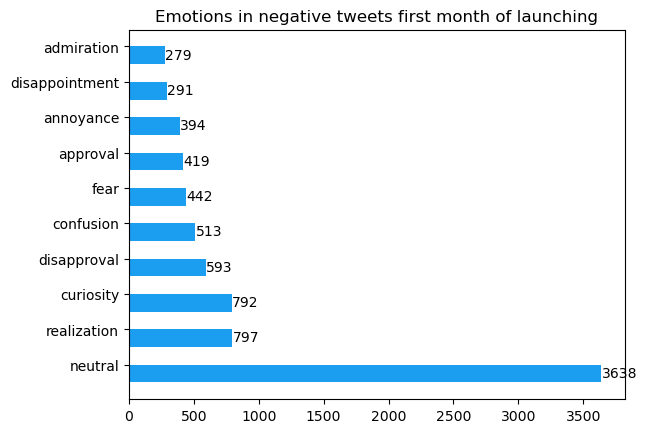

In [162]:
#plot horizontal bar chart, first 10 elements
import matplotlib.pyplot as plt
import numpy as np

labels, values = zip(*sorted_map[:10])

indexes = np.arange(len(labels))
width = 0.5
colors = '#1b9df0'

plt.barh(indexes, values, width, color=colors)
plt.yticks(indexes + width * 0.5, labels)
plt.title('Emotions in negative tweets first month of launching')

#add values to the bars
for i, v in enumerate(values):
    plt.text(v + 3, i - .1 , str(v), color='black',  )

plt.show()



#### positive now

In [163]:
positive_emotion

,emotion
0,optimism
1,joy
2,admiration
3,amusement
4,amusement
...,...
18305,neutral
18306,excitement
18307,admiration
18308,neutral


In [165]:
from collections import Counter
emotions_counts = Counter(positive_emotion['emotion'])

map_emo = {}
for string, count in emotions_counts.items():
    map_emo[string] = count
    #print(f"Class: {string}, Count: {count}")

sorted_map = sorted(map_emo.items(), key=lambda x: x[1])
sorted_map.reverse()

for a in sorted_map:
    print(a)

('neutral', 4181)
('admiration', 3977)
('approval', 2837)
('excitement', 1031)
('realization', 980)
('curiosity', 807)
('joy', 787)
('gratitude', 781)
('surprise', 592)
('amusement', 578)
('love', 472)
('optimism', 426)
('caring', 240)
('desire', 113)
('disapproval', 104)
('confusion', 99)
('fear', 71)
('annoyance', 56)
('disappointment', 47)
('pride', 33)
('relief', 30)
('sadness', 22)
('anger', 16)
('disgust', 13)
('nervousness', 10)
('grief', 3)
('embarrassment', 3)
('remorse', 1)


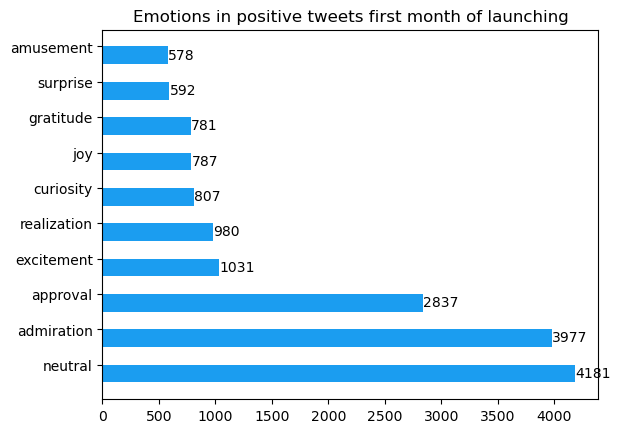

In [166]:
#plot horizontal bar chart, first 10 elements
import matplotlib.pyplot as plt
import numpy as np

labels, values = zip(*sorted_map[:10])

indexes = np.arange(len(labels))
width = 0.5
colors = '#1b9df0'

plt.barh(indexes, values, width, color=colors)
plt.yticks(indexes + width * 0.5, labels)
plt.title('Emotions in positive tweets first month of launching')

#add values to the bars
for i, v in enumerate(values):
    plt.text(v + 3, i - .1 , str(v), color='black' )

plt.show()